### Week 9 Assignment Programming Exercises
**Name: Jinyang Yu**  
**Date: Mar 8, 2023**

## Representation of homosexual people: a text analysis of People's Daily from 1980 to 2022

### Research Background
Representation in media can be a reflection of public attitudes toward homosexuality as well as affect people's attitudes toward homosexuality. The way in which the general public perceives homosexuality has a significant impact on the life experiences of LGBTQ individuals. Negative attitudes towards homosexuality can lead to discrimination, harassment, and even violence against LGBTQ people. China has one of the largest LGBTQ populations in the world [(Wang et al., 2019)](https://www.thelancet.com/journals/lanpub/article/PIIS2468-2667(19)30153-7/fulltext). 

### Research Question
After economic reforms, industrialization, urbanization and globalization have transformed Chinese attitudes toward a wide variety of social issues, including homosexuality [(Xie & Peng, 2018)](https://www.tandfonline.com/doi/full/10.1080/00918369.2017.1386025). On the other hand, it is observed that after President Xi came to power, the Chinese government imposed harsher restrictions against LGBTQ groups.  
What's the representation of homosexual people in People's Daily?  
How the representation of homosexual people in People's Daily changed over time?

### Data
For this project, data was collected from articles published in People's Daily that pertain to the topic of homosexuality (using the keyword 'homosexuality', _tongxinglian_, 同性恋). There are 204 articles (13 pages) containing the keyword homosexuality from 1980 to 2022.

#### 1. Import libraries

In [73]:
import re #regular expression
from bs4 import BeautifulSoup #html parser
import pandas as pd #dataframe
import glob, os #retrieve files/pathnames matching a specified pattern
import seaborn as sns #visualization library
import matplotlib
import matplotlib.pyplot as plt #plotting
import matplotlib.font_manager #font of plots
import jieba #chinese word cutting
import string #import string, which is where we get a list of punctuation
import nltk #First import the Python package nltk (Natural Language Tool Kit)
#NLTK is huge and relies on a bunch of data. These data need to be downloaded. 
# The two lines download the needed NLTK data to your computer
nltk_data = ["punkt", "words", "stopwords", "averaged_perceptron_tagger", 
             "maxent_ne_chunker", 'wordnet', 'vader_lexicon']
nltk.download(nltk_data)
from nltk import word_tokenize#import the function to split the text into separate words from the NLTK package
from nltk.corpus import stopwords #import the stopwords list
from nltk.parse.stanford import StanfordDependencyParser #dependency parser
from snownlp import SnowNLP

[nltk_data] Downloading package punkt to /Users/jinyang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /Users/jinyang/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jinyang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jinyang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/jinyang/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jinyang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jinyang/nltk_data...
[nltk_data]   Package vader_lexicon is alr

#### 2. Generate a dataframe with an entry for each article

In [6]:
path= '/Users/jinyang/Documents/Term_2/SOCI_508/data/peoplesdaily'
os.chdir(path) # directory of text files
filelist = glob.glob("*.html")

articles = []

for file in filelist:
    f = open(file, "r", encoding="utf-8")
    html = f.read()
    soup = BeautifulSoup(html, 'html.parser')
    for div in soup.find_all('div', {'class': 'detail'}):
        title = div.find('h2').get_text()
        date_match = re.search(r'时间：(\d{4}-\d{2}-\d{2})', div.get_text())
        date = date_match.group(1)
        body = div.find('div', {'class': 'detail-p'}).get_text().strip()
        articles.append({'Title': title, 'Date': date, 'Body': body})

df = pd.DataFrame(articles)

In [7]:
df = df.sort_values(by='Date')
df

,Title,Date,Body
58,市长选举与美国式民主,1980-03-13,本报记者 张彦 我们访问旧金山期间，正好赶上改选市长、督察员、检察官和行政司法官，报纸和电...
13,美国保守主义的派别,1981-02-19,里根总统和财政部长唐纳德·里甘（右二）等在办公室审查联邦开支。(人民数据库资料)里根总统的就...
12,《美国之旅》后记,1984-02-10,１ 这是一本访问美国之后所得的诗篇。 １９８２年秋，我作为中国作家代表团的成员之一，到洛...
11,西方的获得性免疫缺损综合症,1985-03-01,近年来，一种使人感到恐惧、厌恶、羞耻和神秘的病——获得性免疫缺损综合症，正日益广泛和迅速地在...
10,美国来的信,1985-03-20,说老实话，小李，我个人认为，美国父母在这方面，实在对他们的子女太纵容了，给了他们太多的自由了...
...,...,...,...
43,网络电影应纳入法律（聚焦审议）,2016-11-02,本报记者 王比学 10月31日，十二届全国人大常委会第二十四次会议分组审议了电影产业促进法...
42,全球接受艾滋病“救命疗法”的人数翻倍,2016-11-23,据新华社日内瓦11月21日电 （记者张淼）联合国艾滋病规划署21日发布报告说，截至2016...
41,美国主流媒体病症透析（人民观察）,2016-12-04,张天培 2016年美国总统大选的结果出现与媒体预测相反的“逆转”，恐怕是美国主流媒体始料未...
40,2016年美国侵犯人权事记,2017-03-10,一月 4日 《华盛顿邮报》网站报道，27岁的非洲裔男子埃里克·约翰·塞内加尔在拉格里的一...


#### 3. Divide articles into four time periods

With data from 1980 to 2022, this project divide articles into four time periods according to the CCP head of each time period: Deng Xiaoping, 1980-1989; Jiang Zemin, 1990-2002; Hu Jintao, 2003-2012; Xi Jinping, 2013-2022.

In [8]:
mask1 = (df['Date'] >= '1980-01-01') & (df['Date'] <= '1989-12-31')
mask2 = (df['Date'] >= '1990-01-01') & (df['Date'] <= '2002-12-31')
mask3 = (df['Date'] >= '2003-01-01') & (df['Date'] <= '2012-12-31')
mask4 = (df['Date'] >= '2013-01-01') & (df['Date'] <= '2022-12-31')
df1 = df[mask1]
df2 = df[mask2]
df3 = df[mask3]
df4 = df[mask4]

In [93]:
df['Date'] = pd.to_datetime(df['Date'])
year_counts = df.groupby(df['Date'].dt.year)['Title'].count()

In [92]:
year_df=pd.DataFrame(year_counts)
year_df=year_df.reset_index()
year_df.rename(columns={"Date": "year", "Title": "count"}, inplace=True)

In [26]:
year_groups = [(1980, 1989), (1990, 2002), (2003, 2012), (2013, 2018)]
year_df['year group'] = pd.cut(year_df['year'], bins=[year_groups[i][0]-1 for i in range(len(year_groups))] + [year_groups[-1][1]], labels=range(len(year_groups)))
year_df=year_df.groupby(year_df['year group'])['count'].sum()
tp_df=pd.DataFrame(year_df)
tp_df['time period']=['1980-1989','1990-2002','2003-2012','2013-2022']
tp_df

,count,time period
year group,,
0,48,1980-1989
1,61,1990-2002
2,73,2003-2012
3,26,2013-2022


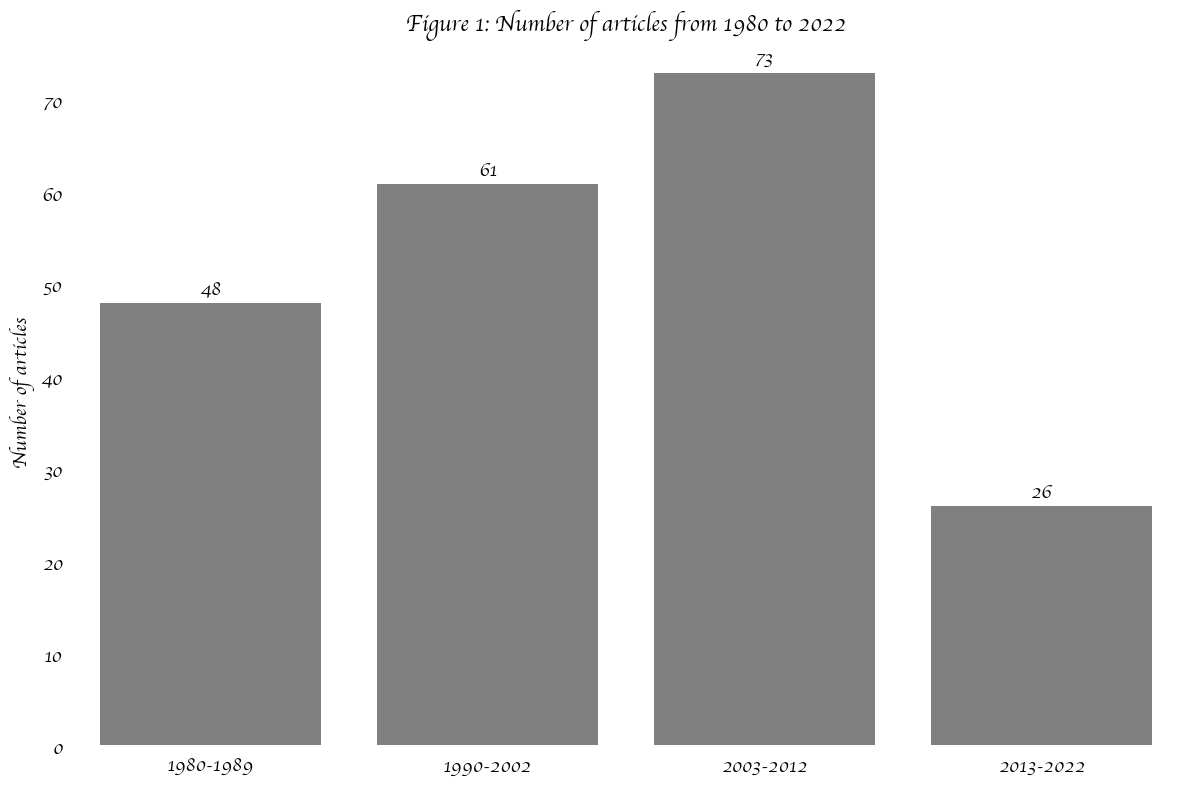

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=tp_df['time period'], y=tp_df['count'], color='grey')
ax.set_facecolor('white') #set background as white

#remove spines around the chart
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

#label the frequency on the top of each bar
for i, bar in enumerate(ax.containers):
    heights = [b.get_height() for b in bar]
    for j, height in enumerate(heights):
        ax.annotate(int(heights[j]), xy=(bar[j].get_x()+ bar[j].get_width() / 2, heights[j]),
                    xytext=(0, 0), 
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14,family='cursive')
    
plt.xlabel('') #year is obvious, we don't need the label
plt.xticks(fontsize=14, family='cursive') #set font and size of year on x-axis

plt.ylabel('Number of articles', fontsize=14, family='cursive') #set y-label
plt.yticks(fontsize=14, family='cursive') #set font and size of year on x-axis

plt.title("Figure 1: Number of articles from 1980 to 2022",family='cursive', size= 16, weight='bold')

#control ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tight_layout() #make sure the layout is efficient

From 1980 to 2012, numbers of articles mentioning homosexuality have increased. During the time period of 2003-2012, 73 articles mentioned homosexuality on People's Daily. However, from 2013 to 2022, there are only 26 articles mentioning homosexuality, which is the fewest among all time periods.

#### 4. Cut words

In [29]:
text1=df1['Body'].to_string()
words1 =jieba.cut(text1)
word_list1 = []
for word1 in words1:
    word_list1.append(word1)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/zj/0n68ddwj13s62557809lw1200000gn/T/jieba.cache
Loading model cost 0.459 seconds.
Prefix dict has been built successfully.


In [41]:
stopwords = [line.strip() for line in open('/Users/jinyang/Documents/Data/stopwords-master/baidu_stopwords.txt', 'r', encoding='UTF-8').readlines()]
wordcounts1 = {}
for word in word_list1:
    if len(word) == 1:
        continue
    if word in stopwords:
        continue
    if word.isnumeric():
        continue
    if word == '新华社' or word== '报道'or word== '...'or word== '本报'or word== '记者' or word== '一种'or word == '本报记者' or word == '日电':
        continue
    else:
        wordcounts1[word]=wordcounts1.get(word, 0) + 1

In [48]:
top_words1 = sorted(wordcounts1.items(), key=lambda x: x[1], reverse=True)[:10]
words1 = [x[0] for x in top_words1]
freqs1 = [x[1] for x in top_words1]
words_eng1=['AIDS','United States','World','found','AIDS ',
           'WHO', 'announced', 'society', 'Beijing','research']

In [43]:
words1

['艾滋病', '美国', '世界', '发现', '爱滋病', '世界卫生组织', '公布', '社会', '北京', '研究']

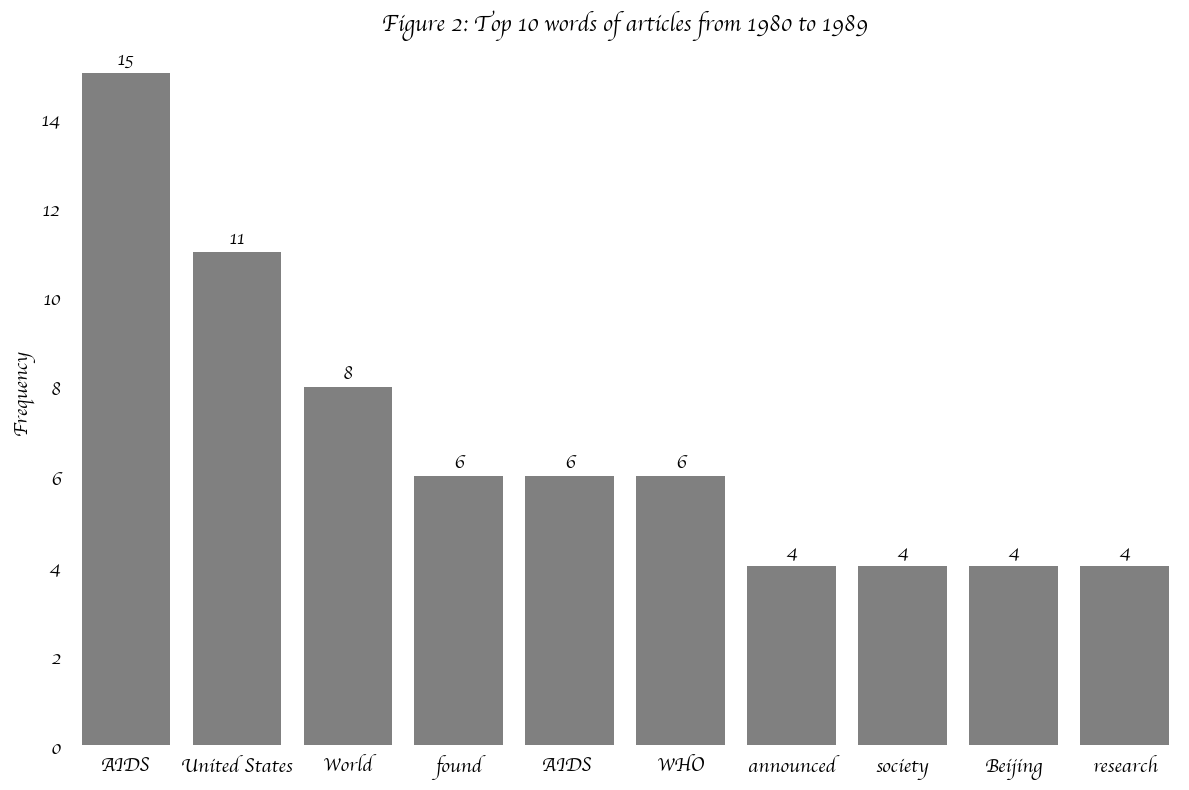

In [49]:
matplotlib.rcParams['font.family'] = ['Heiti TC'] #Show Chinese label

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=words_eng1, y=freqs1, color='grey')
ax.set_facecolor('white') #set background as white

#remove spines around the chart
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

#label the frequency on the top of each bar
for i, bar in enumerate(ax.containers):
    heights = [b.get_height() for b in bar]
    for j, height in enumerate(heights):
        ax.annotate(int(heights[j]), xy=(bar[j].get_x()+ bar[j].get_width() / 2, heights[j]),
                    xytext=(0, 0), 
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14,family='cursive')
        
plt.xlabel('') #year is obvious, we don't need the label
plt.xticks(fontsize=14,family='cursive') #set font and size of year on x-axis

plt.ylabel('Frequency', fontsize=14,family='cursive') #set y-label
plt.yticks(fontsize=14,family='cursive') #set font and size of year on x-axis

plt.title("Figure 2: Top 10 words of articles from 1980 to 1989",size= 16,family='cursive', weight='bold')

#control ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tight_layout() #make sure the layout is efficient

In [52]:
text2=df2['Body'].to_string()
words2 =jieba.cut(text2)
word_list2 = []
for word in words2:
    word_list2.append(word)
wordcounts2 = {}
for word in word_list2:
    if len(word) == 1:
        continue
    if word in stopwords:
        continue
    if word.isnumeric():
        continue
    if word == '新华社' or word== '报道'or word== '...'or word== '本报'or word== '记者' or word== '一种'or word == '本报记者' or word == '日电':
        continue
    else:
        wordcounts2[word]=wordcounts2.get(word, 0) + 1
top_words2 = sorted(wordcounts2.items(), key=lambda x: x[1], reverse=True)[:10]
words2 = [x[0] for x in top_words2]
freqs2 = [x[1] for x in top_words2]
words_eng2=['United States','AIDS','China','found','France','Shanghai',
           'President', 'human right', 'history','Taiwan']

In [51]:
words2

['美国', '艾滋病', '中国', '发现', '法国', '上海', '总统', '人权', '历史', '台湾']

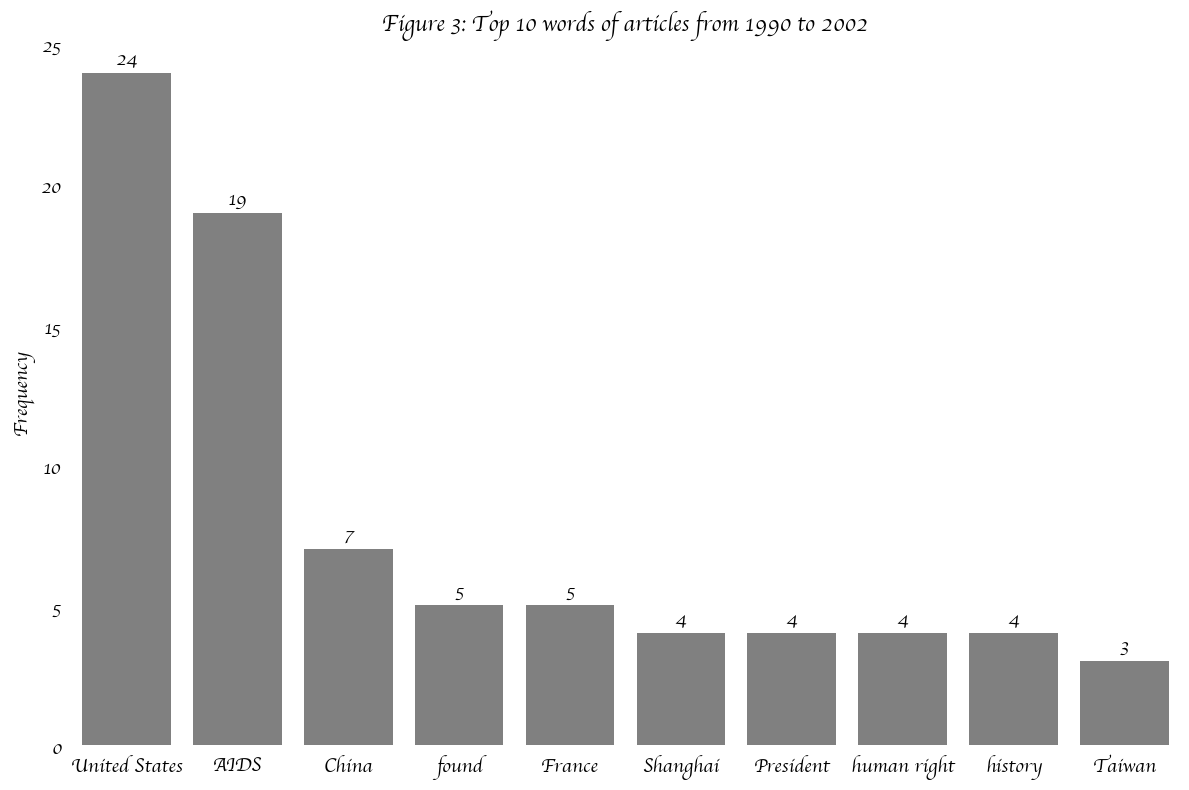

In [54]:
matplotlib.rcParams['font.family'] = ['Heiti TC'] #Show Chinese label

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=words_eng2, y=freqs2, color='grey')
ax.set_facecolor('white') #set background as white

#remove spines around the chart
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

#label the frequency on the top of each bar
for i, bar in enumerate(ax.containers):
    heights = [b.get_height() for b in bar]
    for j, height in enumerate(heights):
        ax.annotate(int(heights[j]), xy=(bar[j].get_x()+ bar[j].get_width() / 2, heights[j]),
                    xytext=(0, 0), 
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14,family='cursive')
        
plt.xlabel('') #year is obvious, we don't need the label
plt.xticks(fontsize=14,family='cursive') #set font and size of year on x-axis

plt.ylabel('Frequency', fontsize=14,family='cursive') #set y-label
plt.yticks(fontsize=14,family='cursive') #set font and size of year on x-axis

plt.title("Figure 3: Top 10 words of articles from 1990 to 2002",size= 16,family='cursive', weight='bold')

#control ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tight_layout() #make sure the layout is efficient

In [56]:
text3=df3['Body'].to_string()
words3 =jieba.cut(text3)
word_list3 = []
for word in words3:
    word_list3.append(word)
wordcounts3 = {}
for word in word_list3:
    if len(word) == 1:
        continue
    if word in stopwords:
        continue
    if word.isnumeric():
        continue
    if word == '新华社' or word== '报道'or word== '...'or word== '本报'or word== '记者' or word== '一种'or word == '本报记者' or word == '日电':
        continue
    else:
        wordcounts3[word]=wordcounts3.get(word, 0) + 1
top_words3 = sorted(wordcounts3.items(), key=lambda x: x[1], reverse=True)[:10]
words3 = [x[0] for x in top_words3]
freqs3 = [x[1] for x in top_words3]
words3

['艾滋病', '美国', '我国', '中国', '世界', '华盛顿', '北京', '国际', '预防', '比利时']

In [57]:
words_eng3=['AIDS','United States','our country','China','World',
            'Washington','Beijing','International', 'prevent', 'Belgium']

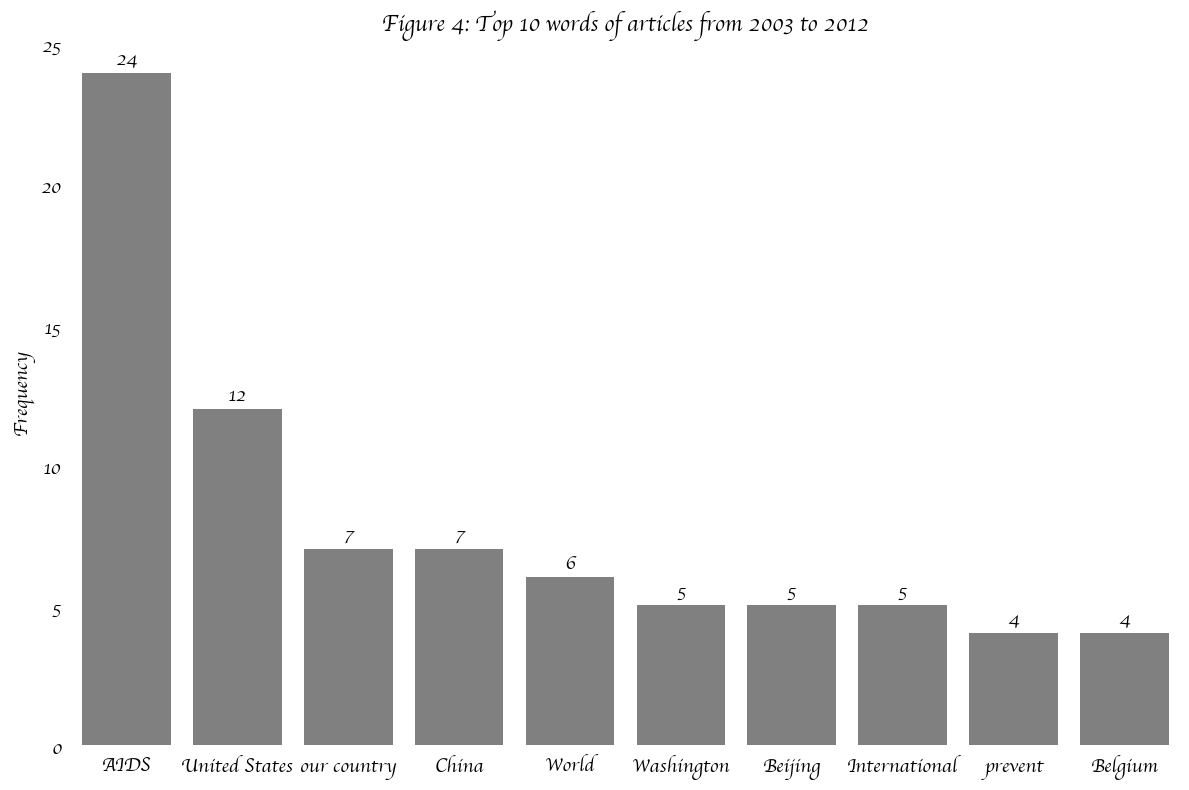

In [60]:
matplotlib.rcParams['font.family'] = ['Heiti TC'] #Show Chinese label

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=words_eng3, y=freqs3, color='grey')
ax.set_facecolor('white') #set background as white

#remove spines around the chart
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

#label the frequency on the top of each bar
for i, bar in enumerate(ax.containers):
    heights = [b.get_height() for b in bar]
    for j, height in enumerate(heights):
        ax.annotate(int(heights[j]), xy=(bar[j].get_x()+ bar[j].get_width() / 2, heights[j]),
                    xytext=(0, 0), 
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14,family='cursive')
        
plt.xlabel('') #year is obvious, we don't need the label
plt.xticks(fontsize=14,family='cursive') #set font and size of year on x-axis

plt.ylabel('Frequency', fontsize=14,family='cursive') #set y-label
plt.yticks(fontsize=14,family='cursive') #set font and size of year on x-axis

plt.title("Figure 4: Top 10 words of articles from 2003 to 2012",size= 16,family='cursive', weight='bold')

#control ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tight_layout() #make sure the layout is efficient

In [62]:
text4=df4['Body'].to_string()
words4 =jieba.cut(text4)
word_list4 = []
for word in words4:
    word_list4.append(word)
wordcounts4 = {}
for word in word_list4:
    if len(word) == 1:
        continue
    if word in stopwords:
        continue
    if word.isnumeric():
        continue
    if word in ['新华社','报道','...','本报','记者','一种','本报记者','日电','日前','一个','图为']:
        continue
    else:
        wordcounts4[word]=wordcounts4.get(word, 0) + 1
top_words4 = sorted(wordcounts4.items(), key=lambda x: x[1], reverse=True)[:10]
words4 = [x[0] for x in top_words4]
freqs4 = [x[1] for x in top_words4]
words4

['美国', '艾滋病', '出版', '女书', '媒体', '克兰', '德国', '一月', '华盛顿邮报', '网站']

In [80]:
words_eng4=['United States','AIDS','published',"women's writing",'media',
            'Cochrane','Germany','January', 'Washington Post', 'website']

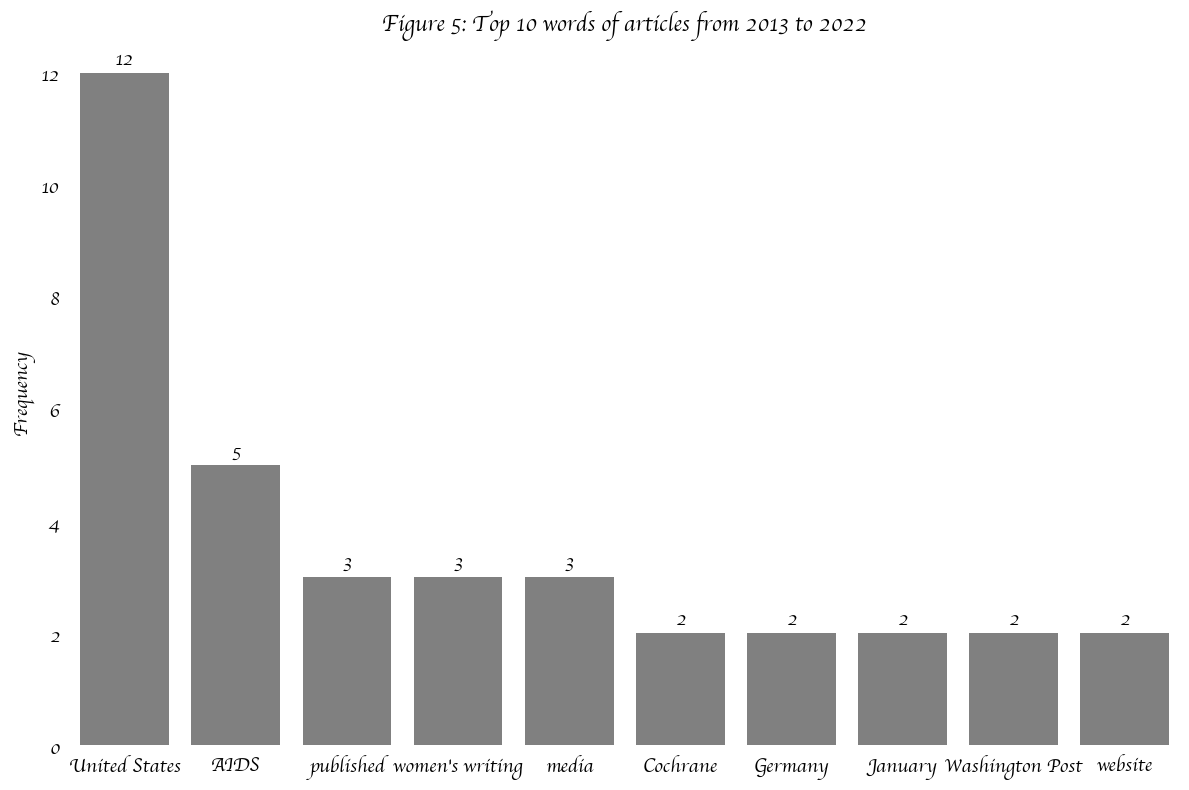

In [81]:
matplotlib.rcParams['font.family'] = ['Heiti TC'] #Show Chinese label

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=words_eng4, y=freqs4, color='grey')
ax.set_facecolor('white') #set background as white

#remove spines around the chart
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

#label the frequency on the top of each bar
for i, bar in enumerate(ax.containers):
    heights = [b.get_height() for b in bar]
    for j, height in enumerate(heights):
        ax.annotate(int(heights[j]), xy=(bar[j].get_x()+ bar[j].get_width() / 2, heights[j]),
                    xytext=(0, 0), 
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14,family='cursive')
        
plt.xlabel('') #year is obvious, we don't need the label
plt.xticks(fontsize=14,family='cursive') #set font and size of year on x-axis

plt.ylabel('Frequency', fontsize=14,family='cursive') #set y-label
plt.yticks(fontsize=14,family='cursive') #set font and size of year on x-axis

plt.title("Figure 5: Top 10 words of articles from 2013 to 2022",size= 16,family='cursive', weight='bold')

#control ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tight_layout() #make sure the layout is efficient

From 1980 to 2022, homosexuality is most frequently linked with AIDS and United States. During 1980-1989, homosexuality was discussed in a medical context, primarily centered around AIDS (high-frequency words like 'WHO','found','research'). From 1990 to 2002, homosexuality was still highly linked with AIDS, but other words suggest a more international perspective instead of only focusing on medical: several countries were mentioned and human right became one of the high-frequency words. High-frequency words from 2013-2012 time period suggest a Continuation of the previous time period. Other than mentioning other countries, this period also showed that the focus on AIDS was shifted from treatment to prevention. Between 2013 and 2022, AIDS was not mentioned as frequently as previous time periods, and United States became the main focus instead.

#### 5. Dependency Parsing

In [86]:
#point to the Stanford model and software

path_to_jar = '/Users/jinyang/Documents/Term_2/SOCI_508/stanford_parser/stanford-corenlp-4.5.2/stanford-corenlp-4.5.2.jar'
path_to_models_jar = '/Users/jinyang/Documents/Term_2/SOCI_508/stanford_parser/stanford-corenlp-4.4.0-models-chinese.jar'

#use the Python NLTK wrapper to implement it
dependency_parser = StanfordDependencyParser(path_to_jar=path_to_jar, path_to_models_jar=path_to_models_jar)

#parse a simple sentence
result = dependency_parser.raw_parse('一名持枪者在奥兰多一个同性恋夜总会内开枪扫射。')

#access the output
dep = result.__next__()

#print the relationships
list(dep.triples())

/var/folders/zj/0n68ddwj13s62557809lw1200000gn/T/ipykernel_64174/1086581605.py:7: DeprecationWarning: The StanfordDependencyParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPDependencyParser instead.
  dependency_parser = StanfordDependencyParser(path_to_jar=path_to_jar, path_to_models_jar=path_to_models_jar)


[(('。', 'NNP'), 'compound', ('一名持枪者在奥兰多一个同性恋夜总会内开枪扫射', 'NNP'))]

The input sentence is 'A gunman opened fire at a gay nightclub in Orlando.'
The result of standford parser is very inaccurate and not interpretable. Next I will use snownlp, a package for simplified Chinese text processing.

#### 6. Part-of-speech Tagging

In [89]:
s = SnowNLP(u'一名持枪者在奥兰多一个同性恋夜总会内开枪扫射。')
list(s.tags)

[('一', 'm'),
 ('名', 'q'),
 ('持枪者', 'n'),
 ('在', 'p'),
 ('奥兰', 's'),
 ('多', 'm'),
 ('一个', 'm'),
 ('同性恋', 'v'),
 ('夜总会', 'n'),
 ('内', 'f'),
 ('开枪', 'v'),
 ('扫射', 'y'),
 ('。', 'w')]

Using the same sentence, the result of snownlp is more interpretable: n refers to noun, a word used to identify any of a class of people, places, or things; v refers to verb, a word used to describe an action, state, or occurrence; w refers to punctuation, a symbol used in writing to separate sentences and their elements and to clarify meaning.

#### 7. Sentiment Analysis

In [90]:
s = SnowNLP(u'一名持枪者在奥兰多一个同性恋夜总会内开枪扫射。')
s.sentiments

0.2185747485300319

The value output range from 0 to 1 with 0 represent negative sentiment while 1 represent positive sentiment. The result of snownlp sentiment analysis is not bad, which interpreting the sentence 'A gunman opened fire at a gay nightclub in Orlando' as mostly negative. 

In [94]:
text = SnowNLP('一名持枪者在奥兰多一个同性恋夜总会内开枪扫射，打死50人，另有53人受伤。这是美国历史上死亡人数最多的枪击事件。')
sent=text.sentences

for sen in sent:
    s=SnowNLP(sen)
    score = s.sentiments
    print("Sentiment score:", score, "Sentence:", sen)

Sentiment score: 0.2185747485300319 Sentence: 一名持枪者在奥兰多一个同性恋夜总会内开枪扫射
Sentiment score: 0.30452015669005794 Sentence: 打死50人
Sentiment score: 0.7901094453202276 Sentence: 另有53人受伤
Sentiment score: 0.9702209429259975 Sentence: 这是美国历史上死亡人数最多的枪击事件


The input text is 'A gunman opened fire at a gay nightclub in Orlando, killing 50 people and injuring 53 others. It was the deadliest shooting in U.S. history.'
The result of sentiment analysis is not that accurate when it comes to the last sentence, which is actually negative while the result interpret it as positive. Anyway, the snownlp provides a way to conduct POS tagging and sentiment analysis of text written in simplified Chinese. 

The result of sentiment analysis suggests that homosexuality could be used in a negative context from 2013 to 2022.